In [1]:
from sympy import *
init_printing()

In [38]:
# Known values
k,dz,z0,U=symbols('k Delta_z z0 U') # average u over [0,dz], given

# independent or unknown
us,z = symbols('u_* z')
u=Function('u')

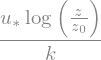

In [39]:
log_profile=us/k*ln(z/z0)
log_profile

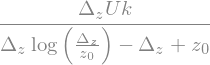

In [47]:
# relate u* and U
us_soln= solve(U-(integrate(log_profile,(z,z0,dz))/dz), us)[0].simplify()
us_soln

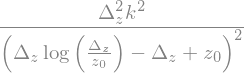

In [48]:
# so us_soln**2 is the stress I want, and it's in terms of knowns.
# Assuming CdB will be used as tau=us**2=CdB*U^2:
CdB_soln=us_soln**2/U**2
CdB_soln

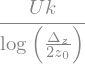

In [49]:
# Compare with the naive approach:
us_soln2= solve(U-log_profile.subs(z,dz/2), us)[0].simplify()
us_soln2

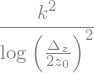

In [50]:
CdB_soln2=us_soln2**2/U**2
CdB_soln2

In [53]:
# that factor of 2...
# both have (log(dz/z0) - X)^2 in the denominator
# simple approach has X=log(2) = 0.69
# exact approach has X=1-z0/dz
log(2).evalf()

In [ ]:
# How exactly is CdB being used?
# Implicit portion, 3d cell:
#  b[k_bed]=1.0+theta*dt*(a[k_bed] + 2*CdB*U_bed_mag/(dz1+dz2))
# Explicit portion, single layer:
#  u -= 2*dt*(1-theta)*CdB/(dzz1+dzz2)*u_bed_mag*u

# So that looks like du/dt=(tau/rho)/dzz, tau/rho=us**2=CdB*U**2
# dzz=(dzz1+dzz2)/2